In [4]:
import numpy as np

In [40]:
num_smaple = 1000

X = np.concatenate((np.random.normal(0, 1, size=(num_smaple//2, 2)), np.random.normal(2, 1, size=(num_smaple//2, 2))))

print(X.shape)

(1000, 2)


In [87]:
def distance(a, b):
    return np.linalg.norm(a-b)

def matrix_membership(U, X, C, m):
    #print(U.shape, X.shape, len(C))
    U_new = np.zeros(shape=U.shape)
    #print(U_new.shape)
    for i in range(U.shape[0]):
        for j in range(U.shape[1]):
            dis_ij = distance(X[i], C[j])
            for k in range(U.shape[1]):
                U_new[i,j] += pow((dis_ij / (distance(X[i], C[k]) + 1e-16)), 2/(m-1))
            U_new[i,j] = 1/U_new[i,j]
    return U_new

def cal_C(U, X, m):
    C = []
    for j in range(U.shape[-1]):
        count = 0
        for i in range(U.shape[0]):
            count += U[i,j]**m * X[i]
        C.append(count/np.sum(U[:,j]**m))
    return C

In [88]:
def FuzzyCMeans(X, num_cluster=2, epslon=1e-4, m=2):
    #init C_0
    index = np.random.randint(low=0, high=X.shape[0], size=num_cluster).tolist()
    U = np.random.rand(X.shape[0], num_cluster)
    U = U / U.sum(axis=1)[:,None]

    for i in range(100):
        #print(f" iter {i}")

        C = cal_C(U, X, m)
        #print(C)
        U_new = matrix_membership(U, X, C, m)
        if distance(U, U_new) <= epslon:
            return C, U_new
        else:
            U = U_new
    return C, U_new

In [89]:
FuzzyCMeans(X, 2)

([array([-0.13983674, -0.02413759]), array([2.08903461, 2.10528123])],
 array([[0.98193046, 0.01806954],
        [0.8411341 , 0.1588659 ],
        [0.99246466, 0.00753534],
        ...,
        [0.08716227, 0.91283773],
        [0.01189155, 0.98810845],
        [0.09652438, 0.90347562]]))

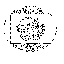

In [90]:
from PIL import Image

im = Image.open('im2.png').resize((64, 64)).convert('1')
im

In [91]:
im = np.array(im).reshape(-1, 1)
im.shape

(4096, 1)

In [92]:
C, U_new = FuzzyCMeans(im, 3)

<ipython-input-87-cbba021b4589>:21: RuntimeWarning: overflow encountered in double_scalars
  count += U[i,j]**m * X[i]
<ipython-input-87-cbba021b4589>:21: RuntimeWarning: invalid value encountered in multiply
  count += U[i,j]**m * X[i]
<ipython-input-87-cbba021b4589>:22: RuntimeWarning: overflow encountered in square
  C.append(count/np.sum(U[:,j]**m))


In [ ]:
U = U_new
for i in U:
    if U[i][0] :
        im[i] = 0

    elif U[i][1] :
        im[i] = 128

    elif U[i][2] :
        im[i] = 255

im = im.reshape(128,128,1)

from matplotlib import cm
im = Image.fromarray(im)